# Global CO₂ Emissions and Energy Consumption: Trends, Forecasts, and Insights
link for dataset: https://data360.worldbank.org/en/dataset/OWID_CB

# Notebook Objective  
Prediction (Python Notebook): Develop, train, and evaluate machine learning model to forecast key environmental and sustainability indicators. Specifically, this notebook aims to predict:  
- CO₂ emissions  
- Energy consumption and usage trends  
- Financial metrics related to sustainability  
- Efficiency measures  

The goal is to generate reliable forecasts for each domain, compare model performance, and provide actionable insights that support long-term planning and decision-making.

## Step 1: Import Libraries  
We begin by importing the necessary Python libraries.  
- `pandas` for handling datasets.  
- `prophet` for time-series forecasting.  
- `matplotlib` for plotting results. 

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

## Step 2: Load Dataset  
Load the cleaned dataset prepared in the **Data Preparation** milestone.  
Previewing the first few rows confirms that the dataset has the expected structure (Country, Indicator, Unit, Year, Value, Unit_Category).  

In [2]:
df = pd.read_csv('emissions_cleaned.csv')
df.head()

,Country,Indicator,Unit,Year,Value,Unit_Category
0,Afghanistan,Annual CO2 emissions (per capita),Ratio,1986,0.274,Ratio
1,Afghanistan,Annual CO2 emissions (per capita),Ratio,1987,0.273,Ratio
2,Afghanistan,Annual CO2 emissions (per capita),Ratio,1988,0.248,Ratio
3,Afghanistan,Annual CO2 emissions (per capita),Ratio,1989,0.233,Ratio
4,Afghanistan,Annual CO2 emissions (per capita),Ratio,1990,0.168,Ratio


## Step 3: Select Top 10 Countries per Indicator  
We define a dictionary that maps each indicator category to its **top 10 countries** (based on 2023 values).  
This ensures the forecasts focus on the largest contributors in each domain:  
- CO₂ emissions  
- Energy consumption  
- Financial metrics  
- Efficiency measures  

In [3]:
#Top 10 countries per indicator
top10_dict = {
    "CO2": {
        "indicator": "Annual CO2 emissions (per capita)",
        "countries": [
            "United States", "China", "Russian Federation", "Brazil", "India",
            "Germany", "United Kingdom", "Japan", "Indonesia", "Canada"
        ]
    },
    "Energy": {
        "indicator": "Primary energy consumption per capita",
        "countries": [
            "Qatar", "Iceland", "Bahrain", "Singapore", "United Arab Emirates",
            "Trinidad and Tobago", "Canada", "Brunei Darussalam", "United States", "Kuwait"
        ]
    },
    "Financial": {
        "indicator": "GDP",
        "countries": [
            "China", "United States", "India", "Japan", "Germany",
            "Russian Federation", "Indonesia", "Brazil", "France", "United Kingdom"
        ]
    },
    "Efficiency": {
        "indicator": "Primary energy consumption per GDP",
        "countries": [
            "Turkmenistan", "Trinidad and Tobago", "Venezuela, RB", "Bahrain", "Iceland",
            "Lao PDR", "Korea, Dem. People's Rep.", "Mozambique", "Oman", "Russian Federation"
        ]
    }
}

## Step 4: Forecast Function  
We define a helper function that:  
1. Filters data for a given indicator and country.  
2. Trains a Prophet model on historical yearly data.  
3. Forecasts values for the next 5 years (2024–2028).  
4. Returns the forecasted results for concatenation and visualization.  

In [4]:
# Forecast function
def forecast_indicator(df, indicator_name, indicator_filter, countries, years_ahead=5):
    forecasts = []
    for country in countries:
        df_country = df[
            (df["Indicator"] == indicator_filter) & 
            (df["Country"] == country)][["Year", "Value"]].rename(columns={"Year": "ds", "Value": "y"})
        df_country["ds"] = pd.to_datetime(df_country["ds"], format="%Y")
        model = Prophet()
        model.fit(df_country)
        future = model.make_future_dataframe(periods=years_ahead, freq="Y")
        forecast = model.predict(future)
        forecast["Country"] = country
        forecast["Indicator"] = indicator_name
        forecasts.append(forecast[["ds", "yhat", "Country", "Indicator"]])
    return pd.concat(forecasts) if forecasts else pd.DataFrame()

## Step 5: Run Forecasts for All Indicators  
Using the forecast function, we loop over:  
- Each indicator (CO₂, Energy, Financial, Efficiency).  
- Each of its top 10 countries.  

The outputs are concatenated into a single dataframe containing all forecasts.  

In [5]:
# Run forecasts for all groups
all_forecasts = []
for group, details in top10_dict.items():
    forecasts = forecast_indicator(df, group, details["indicator"], details["countries"])
    all_forecasts.append(forecasts)

# Combine everything
final_forecasts = pd.concat(all_forecasts)
final_forecasts.rename(columns={"ds": "Year"}, inplace=True)
final_forecasts["Year"] = final_forecasts["Year"].dt.year


01:57:29 - cmdstanpy - INFO - Chain [1] start processing
01:57:29 - cmdstanpy - INFO - Chain [1] done processing
01:57:30 - cmdstanpy - INFO - Chain [1] start processing
01:57:30 - cmdstanpy - INFO - Chain [1] done processing
01:57:30 - cmdstanpy - INFO - Chain [1] start processing
01:57:30 - cmdstanpy - INFO - Chain [1] done processing
01:57:31 - cmdstanpy - INFO - Chain [1] start processing
01:57:31 - cmdstanpy - INFO - Chain [1] done processing
01:57:31 - cmdstanpy - INFO - Chain [1] start processing
01:57:32 - cmdstanpy - INFO - Chain [1] done processing
01:57:32 - cmdstanpy - INFO - Chain [1] start processing
01:57:32 - cmdstanpy - INFO - Chain [1] done processing
01:57:32 - cmdstanpy - INFO - Chain [1] start processing
01:57:33 - cmdstanpy - INFO - Chain [1] done processing
01:57:33 - cmdstanpy - INFO - Chain [1] start processing
01:57:33 - cmdstanpy - INFO - Chain [1] done processing
01:57:34 - cmdstanpy - INFO - Chain [1] start processing
01:57:34 - cmdstanpy - INFO - Chain [1]

## Step 6: Save Forecasts 
We can save the full forecast dataframe into a CSV file for future use.  
This is currently commented out to avoid overwriting, but can be enabled as needed.  

In [6]:
# Save to CSV
final_forecasts.to_csv("forecasts.csv", index=False)
print("✅ Forecasting complete. Results saved to forecasts.csv")
print(final_forecasts.head(20))

✅ Forecasting complete. Results saved to forecasts.csv
    Year       yhat        Country Indicator
0   1986  19.795113  United States       CO2
1   1987  19.852396  United States       CO2
2   1988  19.818614  United States       CO2
3   1989  19.954364  United States       CO2
4   1990  20.102772  United States       CO2
5   1991  20.160055  United States       CO2
6   1992  20.126273  United States       CO2
7   1993  20.262023  United States       CO2
8   1994  20.410431  United States       CO2
9   1995  20.467714  United States       CO2
10  1996  20.433932  United States       CO2
11  1997  20.569635  United States       CO2
12  1998  20.717997  United States       CO2
13  1999  20.775063  United States       CO2
14  2000  20.740884  United States       CO2
15  2001  20.875964  United States       CO2
16  2002  20.909467  United States       CO2
17  2003  20.851730  United States       CO2
18  2004  20.396910  United States       CO2
19  2005  20.110468  United States       CO2


## Step 7: Visualize Forecasts  
We use line plots to visualize the forecasted values for the top 10 countries of each indicator.  

Each plot shows projected trends from 2024–2028, allowing comparison across:  
- **CO₂ emissions** (in tonnes of CO₂ / CO₂-equivalent)  
- **Energy consumption** (in kilowatt-hours / terawatt-hours)  
- **Financial sustainability metrics** (in PPP dollars, 2011 constant prices)  
- **Efficiency measures** (in kWh per PPP)  

The line charts make it easier to see both overall growth/decline and relative differences between countries.  

In [7]:
# Define a plotting function that shows both actuals and forecasts
def plot_forecasts_with_actuals(original_df, forecast_df, indicator_key, indicator_name):
    forecast_subset = forecast_df[forecast_df["Indicator"] == indicator_key]
    actual_subset = original_df[original_df["Indicator"] == indicator_name]
    plt.figure(figsize=(14, 8))   
    for country in forecast_subset["Country"].unique():
        country_forecast = forecast_subset[forecast_subset["Country"] == country]
        country_actuals = actual_subset[actual_subset["Country"] == country]
        line, = plt.plot(country_forecast["Year"], country_forecast["yhat"], '-')
        plt.scatter(country_actuals["Year"], country_actuals["Value"], color=line.get_color(), alpha=0.5, s=15)
        last_year = country_forecast["Year"].iloc[-1]
        last_value = country_forecast["yhat"].iloc[-1]
        plt.text(last_year, last_value, f' {country}', fontsize=9, color=line.get_color(), va='center')
    plt.title(f"Forecast vs. Actuals for {indicator_name}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.grid(True, alpha=0.3)
    plt.show()

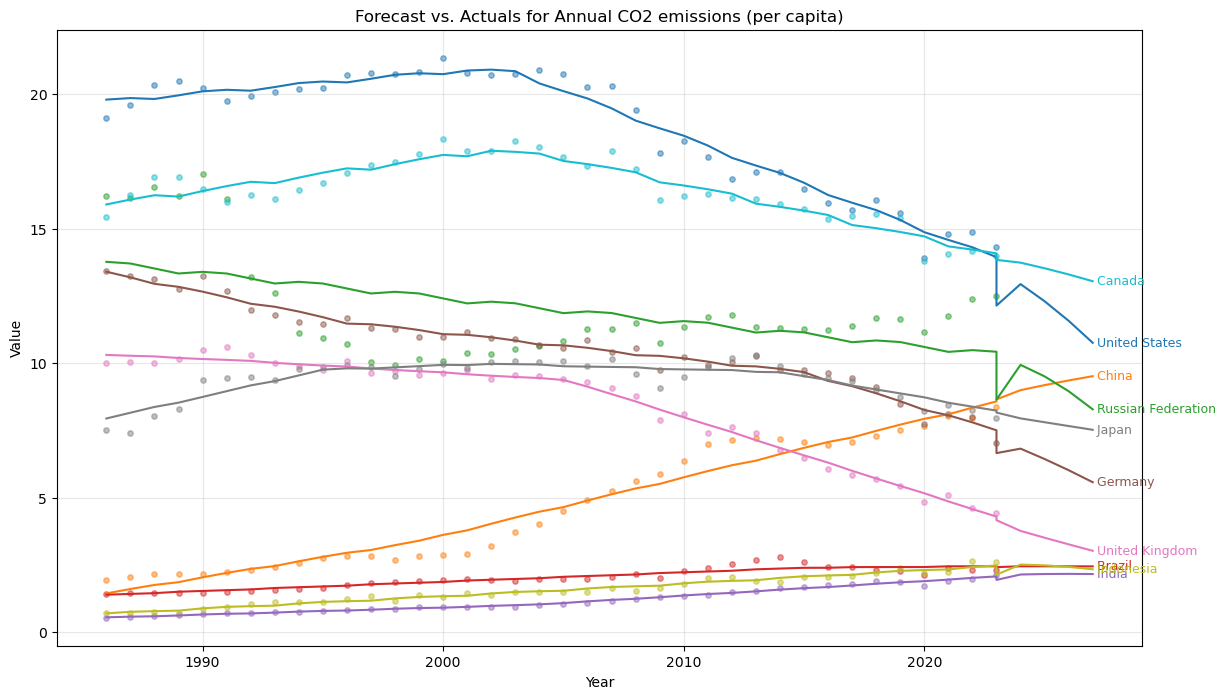

In [8]:
# CO2
plot_forecasts_with_actuals(df, final_forecasts, "CO2", "Annual CO2 emissions (per capita)")

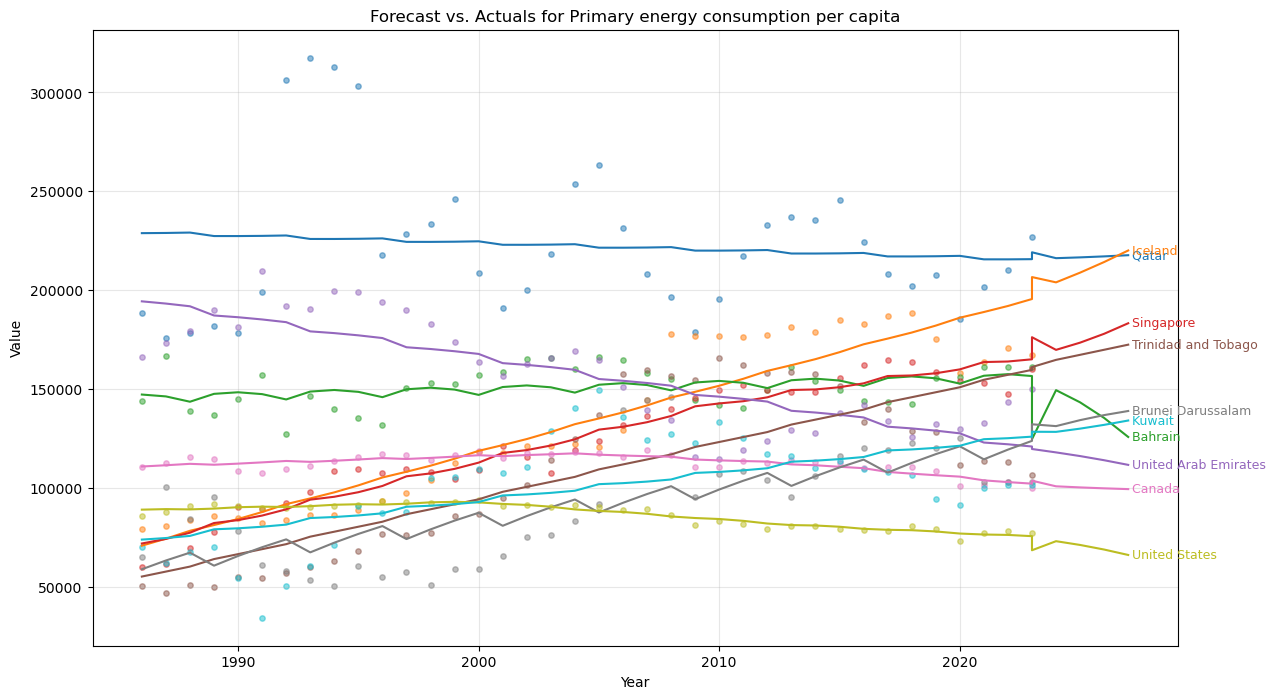

In [9]:
# Energy
plot_forecasts_with_actuals(df, final_forecasts, "Energy", "Primary energy consumption per capita")

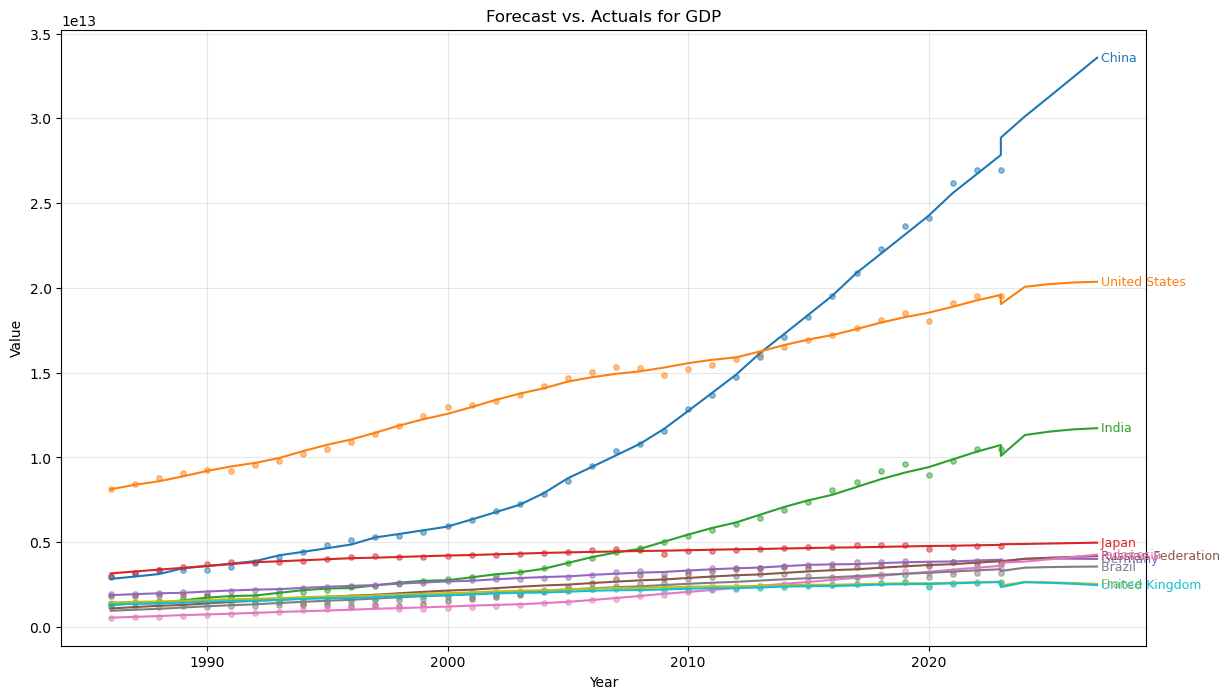

In [10]:
# Financial
plot_forecasts_with_actuals(df, final_forecasts, "Financial", "GDP")

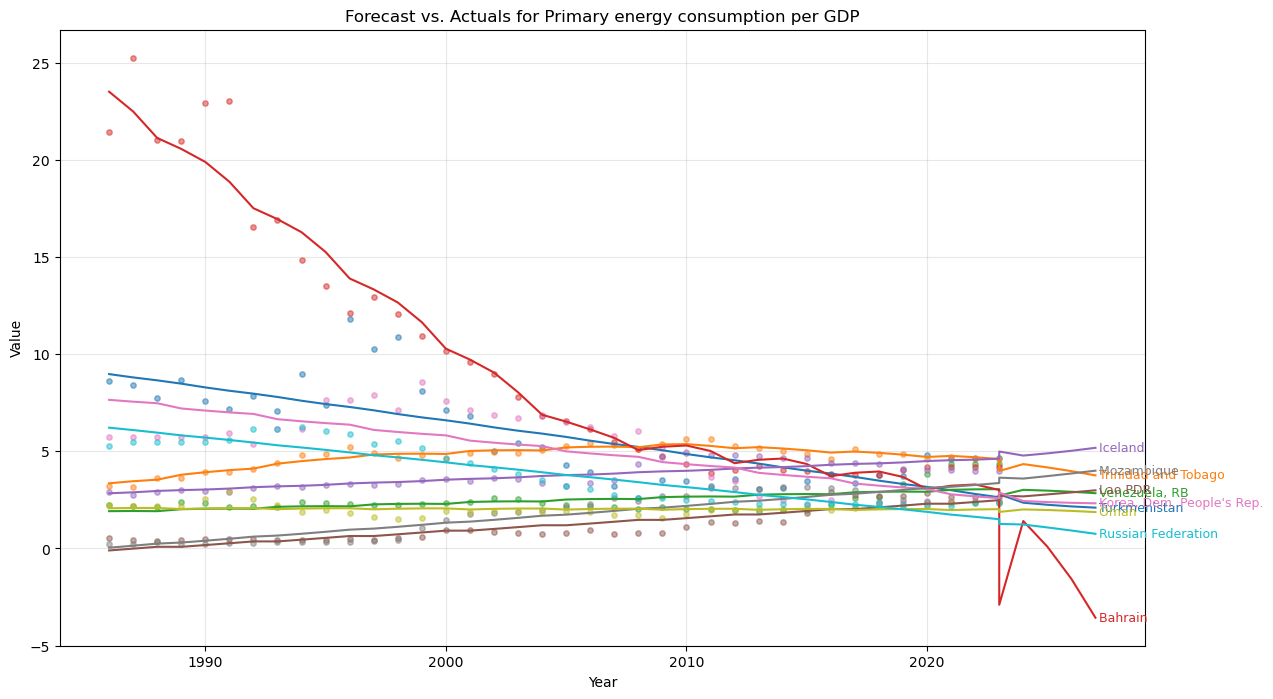

In [11]:
# Efficiency
plot_forecasts_with_actuals(df, final_forecasts, "Efficiency", "Primary energy consumption per GDP")